In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from factor_analyzer import (ConfirmatoryFactorAnalyzer, ModelSpecificationParser) 
import seaborn as sns


In [4]:
prst2 = pd.read_csv("prst2.csv").iloc[:,1:]
prst2.head()

,Adaptable,BestValue,CuttingEdge,Delightful,Exciting,Friendly,Generous,Helpful,Intuitive
0,4,3,5,4,4,5,4,4,4
1,5,4,3,3,3,5,3,3,4
2,3,3,7,3,7,3,6,4,4
3,4,3,3,6,2,3,5,3,2
4,3,3,4,2,5,4,6,4,5


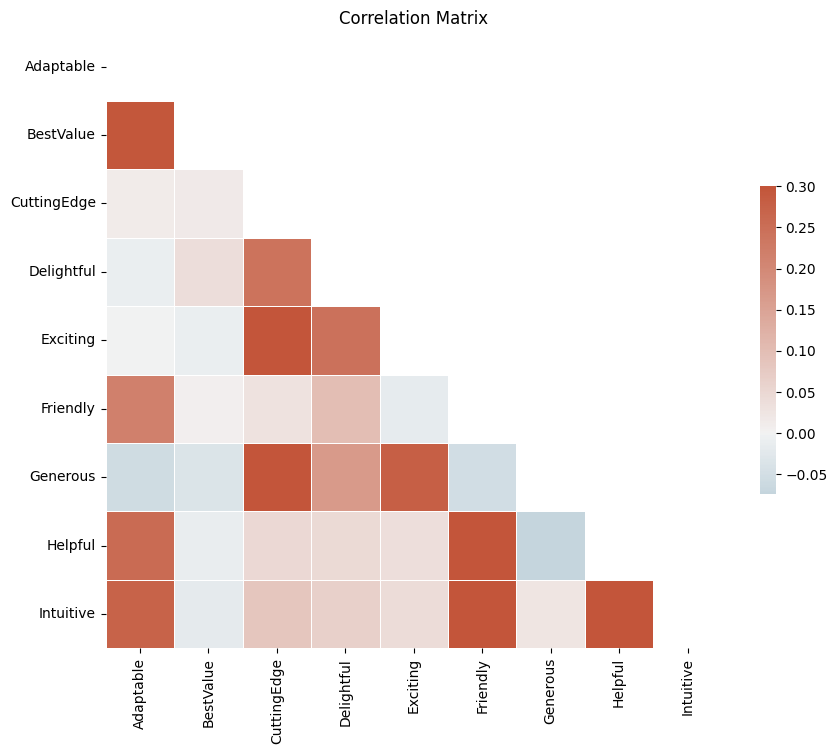

In [6]:
# Calculate the correlation matrix
correlation_matrix = prst2.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a custom colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix')
plt.show()

In [18]:
# Assuming prst2 is a pandas DataFrame
# Define the model
model = {
    'Medium': ['Adaptable', 'BestValue'],
    'High': ['CuttingEdge', 'Delightful', 'Exciting', 'Generous'],
    'Low': ['Friendly', 'Helpful', 'Intuitive', 'Adaptable']
}

model_spec = ModelSpecificationParser.parse_model_specification_from_dict(prst2, model)

prst_fit = ConfirmatoryFactorAnalyzer(model_spec, disp=False, max_iter=2000) 
# Fit the model
prst_fit.fit(prst2.values)

# Print the results
print(prst_fit.loadings_)

[[ 4.42599643  0.          1.75226412]
 [ 0.10582297  0.          0.        ]
 [ 0.          0.74348441  0.        ]
 [ 0.          0.52372045  0.        ]
 [ 0.          0.74904967  0.        ]
 [ 0.          0.08963188  0.        ]
 [ 0.          0.         -0.00553199]
 [ 0.          0.          0.77025467]
 [ 0.          0.          0.87468938]]


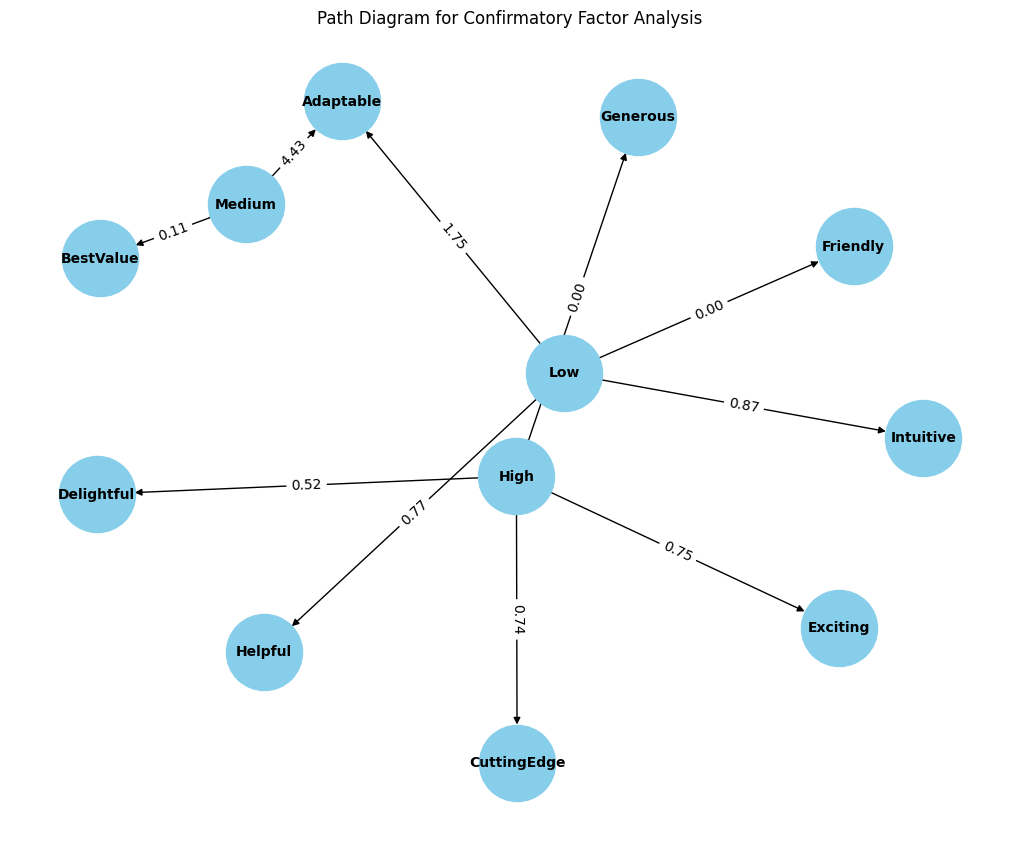

In [32]:
# Define the model structure
edges = [
    ('Medium', 'Adaptable'),
    ('Medium', 'BestValue'),
    ('High', 'CuttingEdge'),
    ('High', 'Delightful'),
    ('High', 'Exciting'),
    ('High', 'Generous'),
    ('Low', 'Friendly'),
    ('Low', 'Helpful'),
    ('Low', 'Intuitive'),
    ('Low', 'Adaptable')
]

# Create a directed graph
G = nx.DiGraph()
G.add_edges_from(edges)

# Set positions for the nodes
pos = nx.spring_layout(G)

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, arrows=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold')

# Annotate edges with loadings
loadings = pd.DataFrame(prst_fit.loadings_, index=prst2.columns, columns=model.keys())
for latent, indicators in model.items():
    for indicator in indicators:
        loading_value = loadings.loc[indicator,latent]  # Get the loading value
        if loading_value is not None:  # Check if loading exists
            nx.draw_networkx_edge_labels(G, pos, edge_labels={(latent, indicator): f"{loading_value:.2f}"})

plt.title('Path Diagram for Confirmatory Factor Analysis')
plt.show()

In [2]:
intent_df =  pd.read_csv("intent-df.csv").iloc[:,1:]
intent_df.head()

,iCuttingEdge,iEaseOfUse,iBestValue,iPreviousModelRating,iCost,iPurchaseIntent
0,6,5,6,5,4,3
1,8,4,8,8,6,7
2,3,5,5,4,3,4
3,4,4,7,4,6,5
4,7,5,6,5,7,6


In [5]:
from semopy import Model

# Assuming intent.df is a pandas DataFrame
# Define the SEM model
sem_model = """
Rating =~ iCuttingEdge + iEaseOfUse + iBestValue
Interest =~ Rating + iPreviousModelRating
Intent =~ Interest + iCost + iPurchaseIntent
"""

# Create a Model instance
model = Model(sem_model)

# Fit the model to the data
model.fit(intent_df)

# Get the results
results = model.inspect()

# Print the results
print(results)

                    lval  op                  rval  Estimate  Std. Err  \
0                 Rating   ~              Interest  1.000000         -   
1               Interest   ~                Intent  1.000000         -   
2           iCuttingEdge   ~                Rating  1.000000         -   
3             iEaseOfUse   ~                Rating  2.628412  0.763993   
4             iBestValue   ~                Rating  3.614628   1.06968   
5   iPreviousModelRating   ~              Interest  7.774703  2.620651   
6                  iCost   ~                Intent  9.082544  3.535875   
7        iPurchaseIntent   ~                Intent  3.414592  1.319263   
8                 Intent  ~~                Intent  0.022585   0.01584   
9               Interest  ~~              Interest  0.014048  0.009904   
10                Rating  ~~                Rating  0.099308  0.055041   
11            iBestValue  ~~            iBestValue  1.613186  0.311295   
12                 iCost  ~~          

In [ ]:
semModel2 = """
Rating =~ iBestValue + iEaseOfUse
Intent =~ Rating + iCost +iPurchaseIntent
"""